#### Задача 1 

Решение задачи МНК для аппроксимации постоянной величиной

Условие задачи
Дана выборка точек $y_1, y_2, \dots, y_n$.  
Найти постоянную величину $a$, минимизирующую функцию потерь:

$$
L(a) = \sum_{i=1}^n (y_i - a)^2
$$

Решение

1. Функция потерь
$$
L(a) = \sum_{i=1}^n (y_i - a)^2
$$

2. Производная функции потерь
$$
\frac{dL}{da} = \sum_{i=1}^n 2(y_i - a)(-1) = -2\sum_{i=1}^n (y_i - a)
$$

3. Условие минимума
Приравниваем производную к нулю:
$$
-2\sum_{i=1}^n (y_i - a) = 0
$$

Выносим постоянный член:
$$
\sum_{i=1}^n y_i - n \cdot a = 0
$$

4. Находим оптимальное значение $a$
$$
n \cdot a = \sum_{i=1}^n y_i
$$

$$
a = \frac{1}{n}\sum_{i=1}^n y_i
$$

Ответ
Оптимальная постоянная величина, минимизирующая сумму квадратов отклонений, равна **среднему арифметическому** выборки:

$$
\boxed{a = \frac{1}{n}\sum_{i=1}^n y_i}
$$

МНК-прямая всегда проходит через центр масс данных

1. Продифференцируем целевую функцию по $a$ и $b$:

**По параметру $b$:**
$$\frac{\partial}{\partial b} \sum_{i=1}^n (y_i - ax_i - b)^2 = -2\sum_{i=1}^n (y_i - ax_i - b) = 0$$
$$\Rightarrow \sum_{i=1}^n y_i - a\sum_{i=1}^n x_i - nb = 0$$

$$n\bar{y} - an\bar{x} - nb = 0$$
$$\bar{y} - a\bar{x} - b = 0$$
$$b = \bar{y} - a\bar{x}$$

2. Подставим $x = \bar{x}, \ y = \bar{y}$:
$$\bar{y} = a(\bar{x} - \bar{x}) + \bar{y} = \bar{y}$$

Таким образом, точка $(\bar{x}, \bar{y})$ удовлетворяет уравнению МНК-прямой.

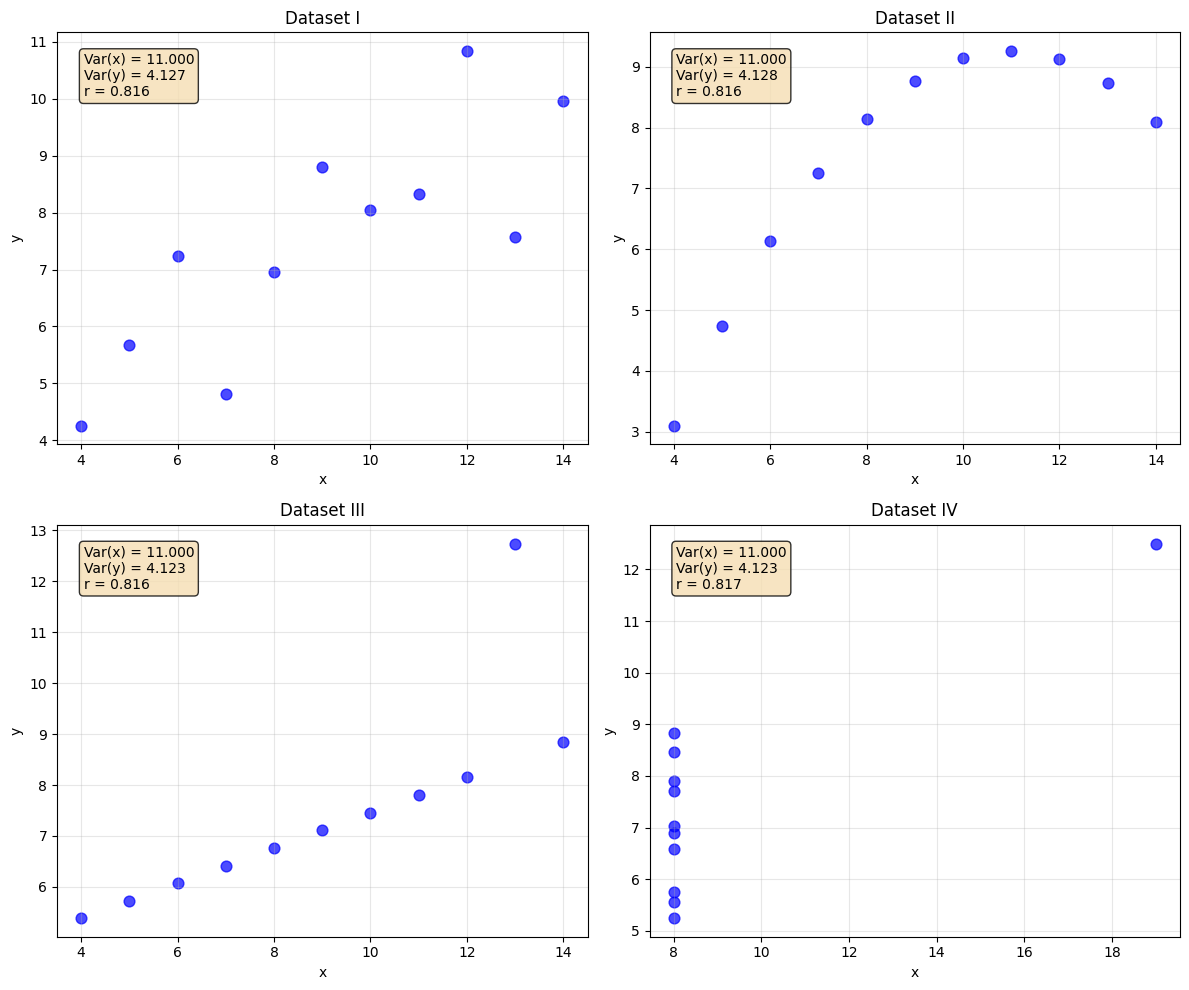

Статистики квартета Энскомба:
Dataset  Var(x)   Var(y)  Correlation
      I    11.0 4.127269     0.816421
     II    11.0 4.127629     0.816237
    III    11.0 4.122620     0.816287
     IV    11.0 4.123249     0.816521

Проверка идентичности средних значений:
Dataset I: mean(x) = 9.00, mean(y) = 7.50
Dataset II: mean(x) = 9.00, mean(y) = 7.50
Dataset III: mean(x) = 9.00, mean(y) = 7.50
Dataset IV: mean(x) = 9.00, mean(y) = 7.50


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

anscombe = sns.load_dataset('anscombe')

results = []

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    data = anscombe[anscombe['dataset'] == dataset]
    x = data['x'].values
    y = data['y'].values
    
    x_var = np.var(x, ddof=1) 
    y_var = np.var(y, ddof=1)
    correlation = np.corrcoef(x, y)[0, 1]
    
    results.append({
        'Dataset': dataset,
        'Var(x)': x_var,
        'Var(y)': y_var,
        'Correlation': correlation
    })
    
    axes[i].scatter(x, y, color='blue', s=60, alpha=0.7)
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_title(f'Dataset {dataset}')
    axes[i].grid(True, alpha=0.3)

    stats_text = f'Var(x) = {x_var:.3f}\nVar(y) = {y_var:.3f}\nr = {correlation:.3f}'
    axes[i].text(0.05, 0.95, stats_text, transform=axes[i].transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

results_df = pd.DataFrame(results)
print("Статистики квартета Энскомба:")
print(results_df.to_string(index=False))

print("\nПроверка идентичности средних значений:")
for dataset in ['I', 'II', 'III', 'IV']:
    data = anscombe[anscombe['dataset'] == dataset]
    print(f"Dataset {dataset}: mean(x) = {data['x'].mean():.2f}, mean(y) = {data['y'].mean():.2f}")

